In [1]:
import pandas as pd

In [2]:
path_to_file = 'bikes_april.csv'
bikes_april = pd.read_csv(path_to_file)

In [3]:
bikes_april.head()

,start_time,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
1,2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0
2,2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
3,2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
4,2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0


In [4]:
bikes_april.start_time = pd.to_datetime(bikes_april.start_time)
bikes_april.end_time   = pd.to_datetime(bikes_april.end_time)

In [5]:
bikes_april.dtypes

start_time           datetime64[ns]
trip_id                       int64
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [6]:
bikes_april = bikes_april.sort_values(by='start_time')
bikes_april_set_index_start_time = bikes_april.set_index('start_time')

Посмотрим на распределение количества аренд для разных групп пользователей (usertype) — customers и subscribers в данных за апрель. 


Сделайте ресемпл по дням для каждой группы и в качестве ответа укажите число аренд за 18 апреля, сделанных пользователями типа Subscriber.

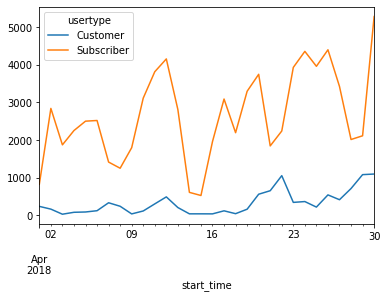

In [13]:
#Посмотрим на распределение количества аренд для разных групп пользователей (usertype)
bikes_april_set_index_start_time.groupby('usertype').resample(rule='D').size().T.plot()

In [10]:
bikes_april_set_index_start_time\
    .query("usertype == 'Subscriber'")\
    .resample(rule='D')\
    .size()\
    .loc['2018-04-18']

2196

In [ ]:
bikes_april_usertype = bikes_april_set_index_start_time\
    .query("usertype == 'Customer'")\
    .resample(rule='D')\
    .size()
bikes_april_usertype

Второй способ через .T

In [15]:
bikes_april_count_subscriber_per_d = bikes_april_set_index_start_time\
    .query("usertype == 'Subscriber'")\
    .resample(rule='D')\
    .size()\
    .to_frame()\
    .T
bikes_april_count_subscriber_per_d['2018-04-18']

0    2196
Name: 2018-04-18 00:00:00, dtype: int64